In [2]:
# Simple 2-layer neural network architecture

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Activation function
def sigmoid(t):
    return 1/(1+np.exp(-t))

# Derivative of sigmoid
def sigmoid_derivative(p):
    return p * (1 - p)


class NeuralNetwork:
    def __init__(self, x, y):
        self.input = x
        self.weights1 = np.random.rand(self.input.shape[1],4)
        self.weights2 = np.random.rand(4,1)
        self.y = y
        self.output = np.zeros(y.shape)
    def forward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
        return self.output
    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
    def train(self,X,y):
        self.output = self.forward()
        self.backprop()
        

In [16]:
# Each row is a training example, each column is a feature  [X1, X2, X3]
X=np.array(([0,0,1],[0,1,1],[1,0,1],[1,1,1]), dtype=float)
y=np.array(([0],[1],[1],[0]), dtype=float)

loss = []
iteration = []
NN = NeuralNetwork(X,y)
for i in range(1500): # trains the NN 1,000 times
    if i % 100 ==0: 
        print ("for iteration # " + str(i) + "\n")
        iteration.append(i)
        print ("Input : \n" + str(X))
        print ("Actual Output: \n" + str(y))
        print ("Predicted Output: \n" + str(NN.forward()))
        print ("Loss: \n" + str(np.mean(np.square(y - NN.forward())))) # mean sum squared loss
        loss.append(np.mean(np.square(y - NN.forward())))
        print ("\n")
  
    NN.train(X, y)

for iteration # 0

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.8114537 ]
 [0.87020943]
 [0.84402393]
 [0.88630642]]
Loss: 
0.37129257878577154


for iteration # 100

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.41746614]
 [0.51282343]
 [0.57604095]
 [0.53715842]]
Loss: 
0.21997485964910768


for iteration # 200

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.18535407]
 [0.7692356 ]
 [0.7959546 ]
 [0.26452361]]
Loss: 
0.049803900006258825


for iteration # 300

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]
 [1.]
 [1.]
 [0.]]
Predicted Output: 
[[0.09127465]
 [0.89854481]
 [0.92208068]
 [0.10034181]]
Loss: 
0.008691029412398263


for iteration # 400

Input : 
[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Actual Output: 
[[0.]

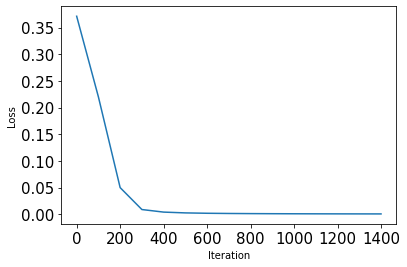

In [23]:
plt.plot(iteration, loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.yticks(fontsize=15);
plt.xticks(fontsize=15);